# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [126]:
# import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [127]:
# pre-Processing of data
display(penguins_df.head())
# print the shape of df
print(f'There are {penguins_df.shape[0]} rows and {penguins_df.shape[1]} columns in the dataframe.')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


There are 344 rows and 5 columns in the dataframe.


In [128]:
# dataframe info
penguins_df.info()
penguins_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [129]:
# Remove the null values and rename dataframe as penguins_clean
penguins_df.dropna(inplace=True)


In [130]:
# check the dataframe
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        335.000000       335.000000         335.000000   335.000000
mean          43.988358        17.169552         214.355224  4209.179104
std            5.453430         1.971966         263.253508   803.633495
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.550000        18.700000         213.000000  4787.500000
max           59.600000        21.500000        5000.000000  6300.000000


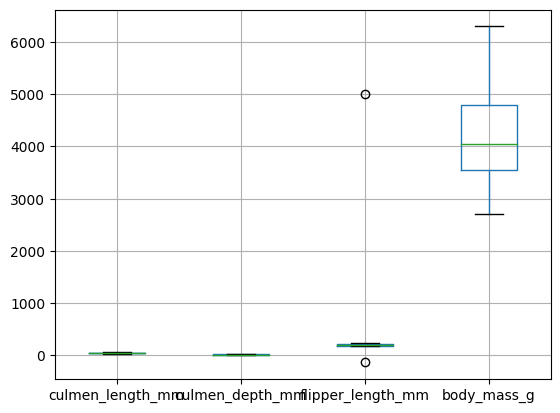

In [131]:
# check if there is any outliers
print(penguins_df.describe())
# use boxplot to visulaise data
penguins_df.boxplot()
plt.show()

In [132]:
# remove the outliers (outside the whiskers)
Q1 = penguins_df['flipper_length_mm'].quantile(0.25)
Q3 = penguins_df['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

penguins_df[(penguins_df['flipper_length_mm'] <= upper_bound) & (penguins_df['flipper_length_mm'] >= lower_bound)]

penguins_clean = penguins_df.drop([9,14])

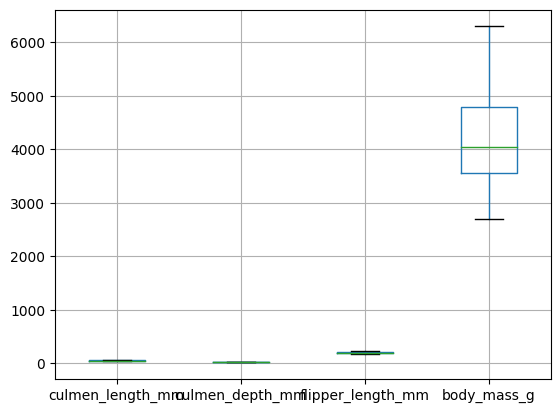

In [133]:
penguins_clean.boxplot()
plt.show()

In [134]:
# using one-hot encoding, add dummy variables and remove the original categorical feature (sex)
#'drop_first=True' parameter will drop the first dummy variable to avoid multicollinearity
penguins_clean = pd.get_dummies(penguins_clean, columns=['sex'], prefix='category', drop_first=True)


In [135]:
# print the dataframe
print(penguins_clean)

     culmen_length_mm  culmen_depth_mm  ...  category_FEMALE  category_MALE
0                39.1             18.7  ...                0              1
1                39.5             17.4  ...                1              0
2                40.3             18.0  ...                1              0
4                36.7             19.3  ...                1              0
5                39.3             20.6  ...                0              1
..                ...              ...  ...              ...            ...
338              47.2             13.7  ...                1              0
340              46.8             14.3  ...                1              0
341              50.4             15.7  ...                0              1
342              45.2             14.8  ...                1              0
343              49.9             16.1  ...                0              1

[333 rows x 6 columns]


In [136]:
# pre-process the cleaned data using standard scailing, initialise the StandardScaler(which will scale mean to 0 and std to 1)
scaling = StandardScaler()
# use the fit_transform method on the clean data
# fit- cal the mean and std of each feature
# transform subtract the mean and divivde by the std for each feature
penguins_preprocessed = scaling.fit_transform(penguins_clean)


In [137]:
# peform PCA analysis for dimension reducibility and extracting features
pca = PCA(n_components = None)
# fit the model on the pre-processed data
penguins_pca = pca.fit(penguins_preprocessed)
# utilize .explained_variance_ratio_ attribute from model to explain the variance ratio for each principle component
variance_ratio=penguins_pca.explained_variance_ratio_
print(variance_ratio)
# from the graph, choose the number of components that capture a high % of total variance(95% or more)

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]


In [138]:
# store the number of components as n_components if ratio >10%
n_components = sum(variance_ratio >0.1)
print(n_components) # will choose first 2 principal components
# run the pca model using n_components and fit to the preprocessed data again
pca = PCA(n_components = n_components)
#fit and transform the pre-processed data and store as penguins_PCA
penguins_PCA = pca.fit_transform(penguins_preprocessed)


2


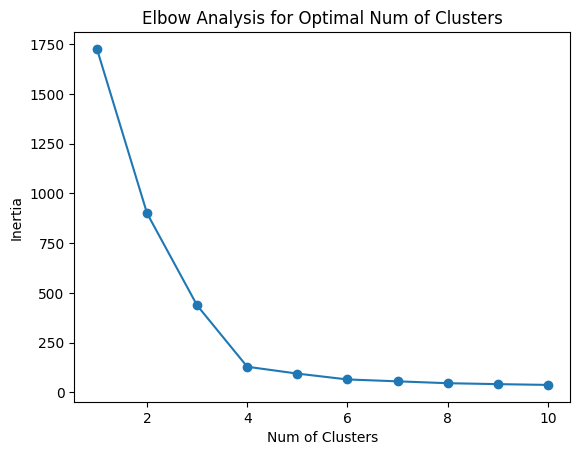

In [139]:
# employ the KMeans (learn to fit data from cluster 1 to 10) on the penguins_PCA, random_state=42 to determine the num of cluster ,saving the optimal cluster as n_cluster
# create an empty list to store the clusters
inertia = []
possible_clusters = range(1,11)

for n_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    
# plot the elbow curve
plt.plot(possible_clusters,inertia,marker='o')
plt.title('Elbow Analysis for Optimal Num of Clusters')
plt.xlabel('Num of Clusters')
plt.ylabel('Inertia')
plt.show()
# look for the point where the decrease in inertia slows down(elbow point)
n_cluster =4

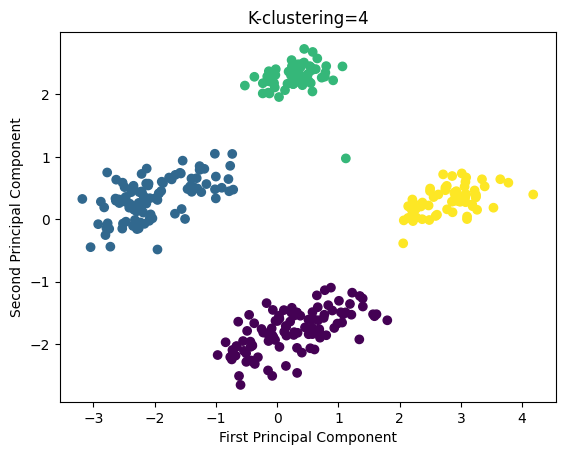

In [140]:
# create and fit a new k-means cluster model, setting n_cluster =n_cluster, saving the model as kmeans
kmeans = KMeans(n_clusters=n_cluster,random_state=42).fit(penguins_PCA)

# visualise the clusters using first 2 principle components, first-principal component = x and second principal = y
x=penguins_PCA[:,0]
y = penguins_PCA[:,1]
#cmap specify the colormap to be used - viridis is a uniform colormap ot be visually consistent when used for continuous data
plt.scatter(x,y,c=kmeans.labels_,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-clustering=4')
plt.show()

In [141]:
# Create a stats table by grouping penguins_clean based on 'label' and calculating the mean of each numeric column, save to stats_penguins
# Assign cluster labels to the 'label' column
penguins_clean['label'] = kmeans.labels_

# Extract only the numeric columns (including 'label')
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']

# Group by 'label' and calculate the mean for each numeric column
stats_penguins = penguins_clean[numeric_columns].groupby('label').mean()


In [142]:
# print the table
print(stats_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             43.878302        19.111321         194.764151
1             40.217757        17.611215         189.046729
2             45.545763        14.262712         212.779661
3             49.473770        15.718033         221.540984


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


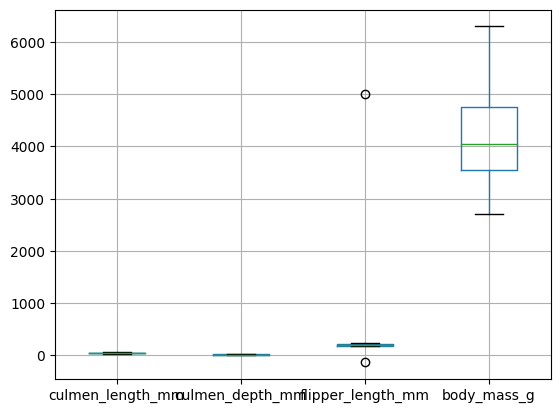

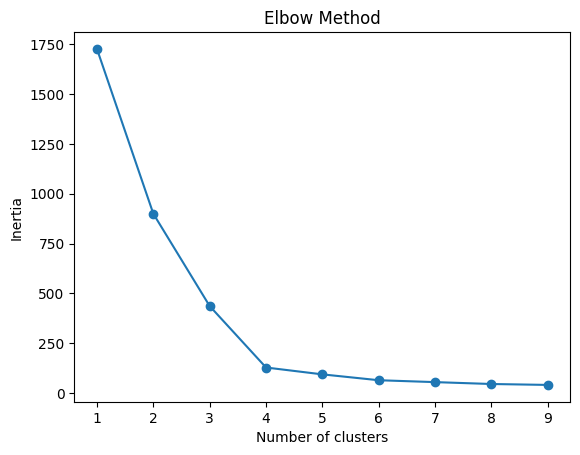

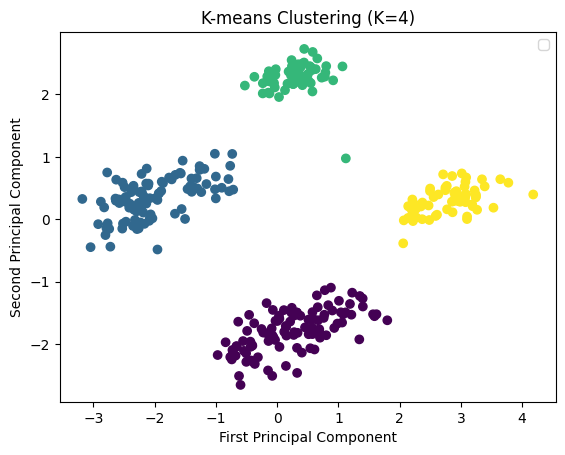

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984


In [143]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()

# Step 2 - Dealing with null values and outliers
penguins_df.boxplot()  
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])

# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

# Step 4 - Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

# Step 5 - Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# Step 7 - Run the k-means clustering algorithm
# with the optimal number of clusters 
# and visualize the resulting clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

# Step 8 - Create a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins